# **Installing Necessary Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install transformers==4.12.2
!pip install bert-abstractive-summarizer
!pip install bert-extractive-summarizer
!pip install spacy==3.2.1
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 69.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.7/212.7 kB 28.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for tokenizers (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tokenizers
Failed to build tokenizers
ERROR: Could not build wheels for tokenizers, which is required to install pyproject.toml-based projects
ERROR: Could not find a version that satisfies the requirement bert-abstractive-summarizer (from versions: none)
ERROR: No matching distribution found for bert-abstractive-summarizer
     ━

# **Import Summarizer**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install python-docx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 2.4 MB/s eta 0:00:00


In [ ]:
import warnings

warnings.simplefilter(action='ignore', category = FutureWarning)

In [ ]:
from summarizer import Summarizer, TransformerSummarizer

/usr/local/lib/python3.10/dist-packages/torch/__init__.py:696: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:451.)
  _C._set_default_tensor_type(t)


# **Define the article body**

In [ ]:
from docx import Document

def read_docx(file_path):
    doc = Document(file_path)
    text = ""
    for paragraph in doc.paragraphs:
        text += paragraph.text + "\n"
    return text

# Example usage
file_path = "/content/drive/MyDrive/Text_Summarization_and_Generation/Article.docx"
art = read_docx(file_path)
print(art)

**Title: Breakthrough in Renewable Energy: Novel Solar Technology Promises Game-Changing Efficiency**

**Introduction:**
In a world increasingly grappling with climate change, the quest for sustainable and efficient energy sources has never been more critical. The latest breakthrough in renewable energy comes in the form of revolutionary solar technology that promises to transform the landscape of clean energy production. Developed by a team of researchers at [Institution/Company], this innovation boasts unprecedented efficiency levels that could potentially revolutionize the global energy sector.

**Background:**
Solar energy has long been hailed as a promising solution to the world's energy needs. Traditional solar panels have made significant strides in recent years, but their efficiency and scalability still pose challenges. However, the emergence of next-generation solar technologies offers renewed hope for a future powered by clean, renewable energy.

**The Breakthrough:**
The br

In [ ]:
Context = art

In [ ]:
print(Context)

**Title: Breakthrough in Renewable Energy: Novel Solar Technology Promises Game-Changing Efficiency**

**Introduction:**
In a world increasingly grappling with climate change, the quest for sustainable and efficient energy sources has never been more critical. The latest breakthrough in renewable energy comes in the form of revolutionary solar technology that promises to transform the landscape of clean energy production. Developed by a team of researchers at [Institution/Company], this innovation boasts unprecedented efficiency levels that could potentially revolutionize the global energy sector.

**Background:**
Solar energy has long been hailed as a promising solution to the world's energy needs. Traditional solar panels have made significant strides in recent years, but their efficiency and scalability still pose challenges. However, the emergence of next-generation solar technologies offers renewed hope for a future powered by clean, renewable energy.

**The Breakthrough:**
The br

# **Summary of original Context**

In [ ]:
from heapq import nlargest
from collections import Counter
import re

def read_article(article):
    sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', article)
    return sentences

def sentence_similarity(sent1, sent2):
    words1 = sent1.split()
    words2 = sent2.split()
    common_words = set(words1) & set(words2)
    return len(common_words)

def build_similarity_matrix(sentences):
    similarity_matrix = [[0 for _ in range(len(sentences))] for _ in range(len(sentences))]
    for i in range(len(sentences)):
        for j in range(len(sentences)):
            if i!= j:
                similarity_matrix[i][j] = sentence_similarity(sentences[i], sentences[j])
    return similarity_matrix

def generate_summary(article, top_n=5):
    summarized_text = ""
    sentences = read_article(article)
    sentence_similarity_matrix = build_similarity_matrix(sentences)
    sentence_similarity_scores = Counter()

    for i in range(len(sentences)):
        sentence_similarity_scores[i] = sum(sente)nce_similarity_matrix[i]

    summarized_sentences = nlargest(top_n, sentence_similarity_scores, key=sentence_similarity_scores.get)

    for sentence_index in summarized_sentences:
        summarized_text += sentences[sentence_index] + " "
    return summarized_text


In [ ]:
# Example usage
article = """
User
*Title: Breakthrough in Renewable Energy: Novel Solar Technology Promises Game-Changing Efficiency**

**Introduction:**
In a world increasingly grappling with climate change, the quest for sustainable and efficient energy sources has never been more critical. The latest breakthrough in renewable energy comes in the form of revolutionary solar technology that promises to transform the landscape of clean energy production. Developed by a team of researchers at [Institution/Company], this innovation boasts unprecedented efficiency levels that could potentially revolutionize the global energy sector.

**Background:**
Solar energy has long been hailed as a promising solution to the world's energy needs. Traditional solar panels have made significant strides in recent years, but their efficiency and scalability still pose challenges. However, the emergence of next-generation solar technologies offers renewed hope for a future powered by clean, renewable energy.

**The Breakthrough:**
The breakthrough technology, dubbed "SolarMax," represents a significant leap forward in solar energy efficiency. Unlike conventional solar panels that rely on photovoltaic cells to convert sunlight into electricity, SolarMax utilizes a novel approach inspired by [describe the inspiration/source of innovation, e.g., biological processes or quantum mechanics].

At the heart of SolarMax lies a sophisticated nanomaterial that exhibits exceptional light-absorbing properties. This material, developed through years of research and experimentation, allows SolarMax to capture a broader spectrum of sunlight, including wavelengths that traditional solar panels cannot harness effectively. As a result, SolarMax achieves an unprecedented efficiency rating of over 40%, far surpassing the capabilities of current solar technologies.

**Key Features and Advantages:**
1. **Enhanced Efficiency:** SolarMax's groundbreaking design enables it to convert a higher percentage of sunlight into electricity, maximizing energy output and optimizing space utilization.
2. **Versatility:** SolarMax is adaptable to various environments and applications, from residential rooftops to large-scale solar farms, making it a versatile solution for diverse energy needs.
3. **Durability:** The nanomaterial used in SolarMax is highly durable and resilient, ensuring long-term performance and minimal maintenance requirements.
4. **Scalability:** The modular design of SolarMax facilitates easy scalability, allowing for seamless integration into existing solar infrastructure or the development of new solar projects of any size.

**Potential Impact:**
The implications of SolarMax extend far beyond its impressive technical specifications. With its unparalleled efficiency and versatility, this breakthrough technology has the potential to revolutionize the global energy landscape in several ways:

1. **Accelerated Transition to Renewable Energy:** By significantly increasing the efficiency of solar energy production, SolarMax could expedite the transition away from fossil fuels, reducing greenhouse gas emissions and mitigating the effects of climate change.
2. **Energy Independence:** SolarMax's widespread adoption could enhance energy independence for countries, reducing reliance on imported fossil fuels and strengthening energy security.
3. **Economic Opportunities:** The development and deployment of SolarMax could create new economic opportunities, driving job growth in the renewable energy sector and stimulating innovation and investment.
4. **Access to Clean Energy:** SolarMax's scalability and affordability could improve access to clean energy in underserved communities, empowering individuals and regions with sustainable power sources.

**Challenges and Future Directions:**
While SolarMax represents a remarkable achievement in renewable energy technology, several challenges and considerations remain:

1. **Cost:** Despite its impressive efficiency, SolarMax's initial manufacturing and installation costs may present barriers to widespread adoption, particularly in developing countries or regions with limited resources.
2. **Technological Advancements:** Continued research and development are essential to further optimize SolarMax's performance, reduce production costs, and address any potential environmental or safety concerns associated with its use.
3. **Integration and Infrastructure:** The integration of SolarMax into existing energy infrastructure and regulatory frameworks will require careful planning and coordination to maximize its benefits and ensure a smooth transition.
4. **Global Cooperation:** Achieving the full potential of SolarMax and other renewable energy technologies will require international cooperation and collaboration to overcome political, economic, and logistical challenges.

**Conclusion:**
The development of SolarMax represents a significant milestone in the pursuit of sustainable energy solutions. With its unprecedented efficiency and versatility, this breakthrough technology holds the promise of a cleaner, more resilient energy future for generations to come.
 As researchers continue to push the boundaries of innovation and technology, SolarMax serves as a shining example of human ingenuity and determination in the face of one of the greatest challenges of our time: combating climate change and securing a sustainable planet for future generations.
"""

In [ ]:
summary = generate_summary(article)
print("Summary:")
print(summary)

Summary:
With its unprecedented efficiency and versatility, this breakthrough technology holds the promise of a cleaner, more resilient energy future for generations to come.  As researchers continue to push the boundaries of innovation and technology, SolarMax serves as a shining example of human ingenuity and determination in the face of one of the greatest challenges of our time: combating climate change and securing a sustainable planet for future generations. **Accelerated Transition to Renewable Energy:** By significantly increasing the efficiency of solar energy production, SolarMax could expedite the transition away from fossil fuels, reducing greenhouse gas emissions and mitigating the effects of climate change. **Integration and Infrastructure:** The integration of SolarMax into existing energy infrastructure and regulatory frameworks will require careful planning and coordination to maximize its benefits and ensure a smooth transition. **Economic Opportunities:** The develop

# **Using BERT**

In [ ]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
bert_model = Summarizer()
bert_summary = ''.join(bert_model(Context, min_length=100))
print('Bert Summary:')
print(bert_summary)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Bert Summary:
**Title: Breakthrough in Renewable Energy: Novel Solar Technology Promises Game-Changing Efficiency**

**Introduction:**
In a world increasingly grappling with climate change, the quest for sustainable and efficient energy sources has never been more critical. **Background:**
Solar energy has long been hailed as a promising solution to the world's energy needs. Traditional solar panels have made significant strides in recent years, but their efficiency and scalability still pose challenges. **The Breakthrough:**
The breakthrough technology, dubbed "SolarMax," represents a significant leap forward in solar energy efficiency. Cost:** Despite its impressive efficiency, SolarMax's initial manufacturing and installation costs may present barriers to widespread adoption, particularly in developing countries or regions with limited resources. With its unprecedented efficiency and versatility, this breakthrough technology holds the promise of a cleaner, more resilient energy futu

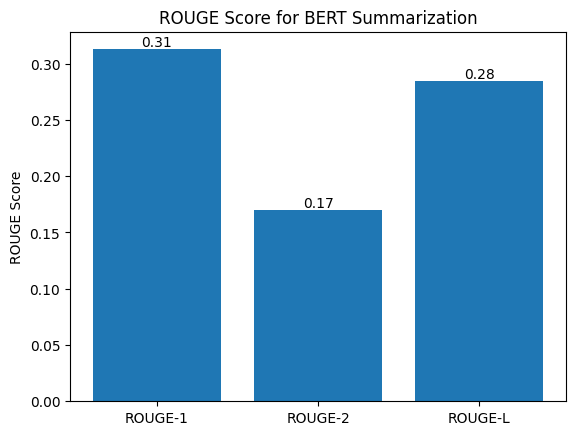

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
!pip install rouge
from rouge import Rouge

# Function to calculate ROUGE score
def calculate_rouge_score(bert_summary, summary):
    rouge = Rouge()
    scores = rouge.get_scores(bert_summary,summary)
    return scores[0]['rouge-1']['f'], scores[0]['rouge-2']['f'], scores[0]['rouge-l']['f']

# Example data
bert_summary = '''
                  **Title: Breakthrough in Renewable Energy: Novel Solar Technology Promises Game-Changing Efficiency**

**Introduction:**
In a world increasingly grappling with climate change, the quest for sustainable and efficient energy sources has never been more critical. **Background:**
Solar energy has long been hailed as a promising solution to the world's energy needs. Traditional solar panels have made significant strides in recent years, but their efficiency and scalability still pose challenges. **The Breakthrough:**
The breakthrough technology, dubbed "SolarMax," represents a significant leap forward in solar energy efficiency. Cost:** Despite its impressive efficiency, SolarMax's initial manufacturing and installation costs may present barriers to widespread adoption, particularly in developing countries or regions with limited resources. With its unprecedented efficiency and versatility, this breakthrough technology holds the promise of a cleaner, more resilient energy future for generations to come.
                '''

actual_summary = '''
With its unprecedented efficiency and versatility, this breakthrough technology holds the promise of a cleaner, more resilient energy future for generations to come.  As researchers continue to push the boundaries of innovation and technology, SolarMax serves as a shining example of human ingenuity and determination in the face of one of the greatest challenges of our time: combating climate change and securing a sustainable planet for future generations. **Accelerated Transition to Renewable Energy:** By significantly increasing the efficiency of solar energy production, SolarMax could expedite the transition away from fossil fuels, reducing greenhouse gas emissions and mitigating the effects of climate change. **Integration and Infrastructure:** The integration of SolarMax into existing energy infrastructure and regulatory frameworks will require careful planning and coordination to maximize its benefits and ensure a smooth transition. **Economic Opportunities:** The development and deployment of SolarMax could create new economic opportunities, driving job growth in the renewable energy sector and stimulating innovation and investment.
                  '''

# Calculate ROUGE score for BERT-generated summary
rouge_scores = calculate_rouge_score(bert_summary, summary)

# Plotting
labels = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']
scores = rouge_scores

plt.bar(labels, scores)
plt.ylabel('ROUGE Score')
plt.title('ROUGE Score for BERT Summarization')

for i in range(len(scores)):
    plt.text(i, scores[i], f'{scores[i]:.2f}', ha='center', va='bottom')

plt.show()


# **Using GPT-2**

In [ ]:
gpt2_model = TransformerSummarizer(transformer_type = 'GPT2', transformer_model_key = 'gpt2-medium')
gpt2_summary = ''.join(gpt2_model(Context, min_length=100))
print('gpt2 summary:', gpt2_summary)

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

gpt2 summary: **Title: Breakthrough in Renewable Energy: Novel Solar Technology Promises Game-Changing Efficiency**

**Introduction:**
In a world increasingly grappling with climate change, the quest for sustainable and efficient energy sources has never been more critical. At the heart of SolarMax lies a sophisticated nanomaterial that exhibits exceptional light-absorbing properties. Energy Independence:** SolarMax's widespread adoption could enhance energy independence for countries, reducing reliance on imported fossil fuels and strengthening energy security. Cost:** Despite its impressive efficiency, SolarMax's initial manufacturing and installation costs may present barriers to widespread adoption, particularly in developing countries or regions with limited resources. **Conclusion:**
The development of SolarMax represents a significant milestone in the pursuit of sustainable energy solutions. With its unprecedented efficiency and versatility, this breakthrough technology holds th

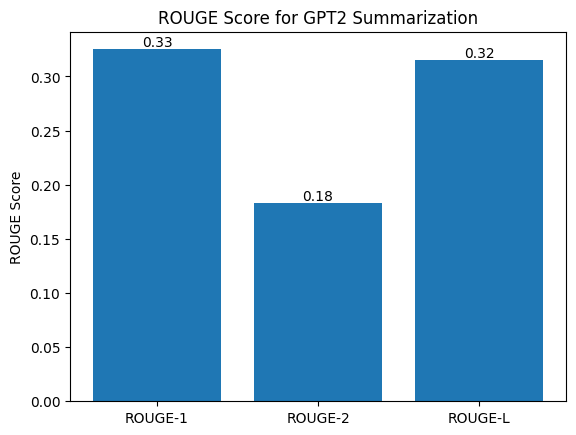

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from rouge import Rouge

# Function to calculate ROUGE score
def calculate_rouge_score(gpt2_summary, summary):
    rouge = Rouge()
    scores = rouge.get_scores(gpt2_summary, summary)
    return scores[0]['rouge-1']['f'], scores[0]['rouge-2']['f'], scores[0]['rouge-l']['f']

# Example data
gpt2_summary = '''
              **Introduction:**
In a world increasingly grappling with climate change, the quest for sustainable and efficient energy sources has never been more critical. At the heart of SolarMax lies a sophisticated nanomaterial that exhibits exceptional light-absorbing properties. Energy Independence:** SolarMax's widespread adoption could enhance energy independence for countries, reducing reliance on imported fossil fuels and strengthening energy security. Cost:** Despite its impressive efficiency, SolarMax's initial manufacturing and installation costs may present barriers to widespread adoption, particularly in developing countries or regions with limited resources. **Conclusion:**
The development of SolarMax represents a significant milestone in the pursuit of sustainable energy solutions. With its unprecedented efficiency and versatility, this breakthrough technology holds the promise of a cleaner, more resilient energy future for generations to come.
              '''
actual_summary = '''
                  With its unprecedented efficiency and versatility, this breakthrough technology holds the promise of a cleaner, more resilient energy future for generations to come.
                   As researchers continue to push the boundaries of innovation and technology, SolarMax serves as a shining example of human ingenuity and determination in the face of one of the greatest challenges of our time: combating climate change and securing a sustainable planet for future generations. **Accelerated Transition to Renewable Energy:** By significantly increasing the efficiency of solar energy production, SolarMax could expedite the transition away from fossil fuels, reducing greenhouse gas emissions and mitigating the effects of climate change. **Integration and Infrastructure:** The integration of SolarMax into existing energy infrastructure and regulatory frameworks will require careful planning and coordination to maximize its benefits and ensure a smooth transition.
                  **Economic Opportunities:** The development and deployment of SolarMax could create new economic opportunities, driving job growth in the renewable energy sector and stimulating innovation and investment.
                  '''

# Calculate ROUGE score for BERT-generated summary
rouge_scores = calculate_rouge_score(gpt2_summary, summary)

# Plotting
labels = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']
scores = rouge_scores

plt.bar(labels, scores)
plt.ylabel('ROUGE Score')
plt.title('ROUGE Score for GPT2 Summarization')

for i in range(len(scores)):
    plt.text(i, scores[i], f'{scores[i]:.2f}', ha='center', va='bottom')

plt.show()

# **Using XL-NET**

In [ ]:
XLNet_model = TransformerSummarizer(transformer_type = 'XLNet', transformer_model_key = 'xlnet/xlnet-base-cased')
XLNet_summary = ''.join(XLNet_model(Context, min_length=100))
print('XLNet Summary:', XLNet_summary)

config.json:   0%|          | 0.00/760 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/467M [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/798k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

XLNet Summary: **Title: Breakthrough in Renewable Energy: Novel Solar Technology Promises Game-Changing Efficiency**

**Introduction:**
In a world increasingly grappling with climate change, the quest for sustainable and efficient energy sources has never been more critical. The latest breakthrough in renewable energy comes in the form of revolutionary solar technology that promises to transform the landscape of clean energy production. Enhanced Efficiency:** SolarMax's groundbreaking design enables it to convert a higher percentage of sunlight into electricity, maximizing energy output and optimizing space utilization. Scalability:** The modular design of SolarMax facilitates easy scalability, allowing for seamless integration into existing solar infrastructure or the development of new solar projects of any size. Economic Opportunities:** The development and deployment of SolarMax could create new economic opportunities, driving job growth in the renewable energy sector and stimulati

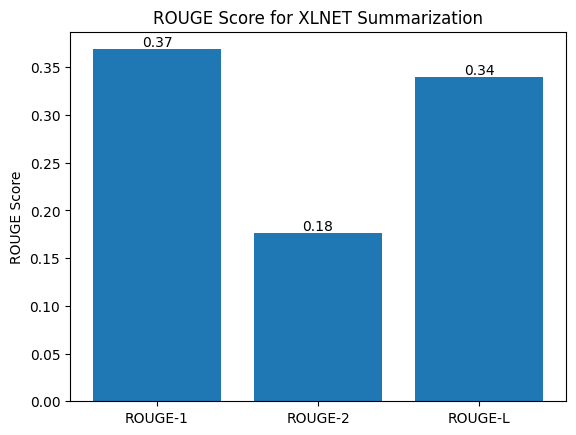

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from rouge import Rouge

# Function to calculate ROUGE score
def calculate_rouge_score(XLNetsummary, summary):
    rouge = Rouge()
    scores = rouge.get_scores(XLNet_summary, summary)
    return scores[0]['rouge-1']['f'], scores[0]['rouge-2']['f'], scores[0]['rouge-l']['f']

# Example data
XLNet_summary = '''
              **Title: Breakthrough in Renewable Energy: Novel Solar Technology Promises Game-Changing Efficiency**

**Introduction:**
In a world increasingly grappling with climate change, the quest for sustainable and efficient energy sources has never been more critical. The latest breakthrough in renewable energy comes in the form of revolutionary solar technology that promises to transform the landscape of clean energy production. At the heart of SolarMax lies a sophisticated nanomaterial that exhibits exceptional light-absorbing properties. Scalability:** The modular design of SolarMax facilitates easy scalability, allowing for seamless integration into existing solar infrastructure or the development of new solar projects of any size. Economic Opportunities:** The development and deployment of SolarMax could create new economic opportunities, driving job growth in the renewable energy sector and stimulating innovation and investment. **Conclusion:**
The development of SolarMax represents a significant milestone in the pursuit of sustainable energy solutions.
              '''
actual_summary = '''
                  With its unprecedented efficiency and versatility, this breakthrough technology holds the promise of a cleaner, more resilient energy future for generations to come.
                   As researchers continue to push the boundaries of innovation and technology, SolarMax serves as a shining example of human ingenuity and determination in the face of one of the greatest challenges of our time: combating climate change and securing a sustainable planet for future generations. **Accelerated Transition to Renewable Energy:** By significantly increasing the efficiency of solar energy production, SolarMax could expedite the transition away from fossil fuels, reducing greenhouse gas emissions and mitigating the effects of climate change. **Integration and Infrastructure:** The integration of SolarMax into existing energy infrastructure and regulatory frameworks will require careful planning and coordination to maximize its benefits and ensure a smooth transition.
                  **Economic Opportunities:** The development and deployment of SolarMax could create new economic opportunities, driving job growth in the renewable energy sector and stimulating innovation and investment.
                  '''

# Calculate ROUGE score for BERT-generated summary
rouge_scores = calculate_rouge_score(XLNet_summary, summary)

# Plotting
labels = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']
scores = rouge_scores

plt.bar(labels, scores)
plt.ylabel('ROUGE Score')
plt.title('ROUGE Score for XLNET Summarization')

for i in range(len(scores)):
    plt.text(i, scores[i], f'{scores[i]:.2f}', ha='center', va='bottom')

plt.show()

In [ ]:
!pip install transformers

In [ ]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

# **Using PEGASUS**

In [ ]:
from transformers import PegasusForConditionalGeneration, PegasusTokenizer

pegasus_tokenizer = PegasusTokenizer.from_pretrained('google/pegasus-large')
pegasus_model = PegasusForConditionalGeneration.from_pretrained("google/pegasus-large")

inputs = pegasus_tokenizer([Context], max_length = 900, return_tensors='pt', truncation=True)

pegasus_summary_ids = pegasus_model.generate(inputs['input_ids'], max_length =200, min_length=60, length_penalty=2.0, num_beams=4, early_stopping=True)
pegasus_summary = pegasus_tokenizer.decode(pegasus_summary_ids[0], skip_special_tokens=True)

print('Pegasus Summary:', pegasus_summary)

tokenizer_config.json:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/3.09k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-large and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/260 [00:00<?, ?B/s]

Pegasus Summary: **Title: Breakthrough in Renewable Energy: Novel Solar Technology Promises Game-Changing Efficiency** **Introduction:** In a world increasingly grappling with climate change, the quest for sustainable and efficient energy sources has never been more critical. With its unparalleled efficiency and versatility, this breakthrough technology has the potential to revolutionize the global energy landscape in several ways: 1. **Accelerated Transition to Renewable Energy:** By significantly increasing the efficiency of solar energy production, SolarMax could expedite the transition away from fossil fuels.


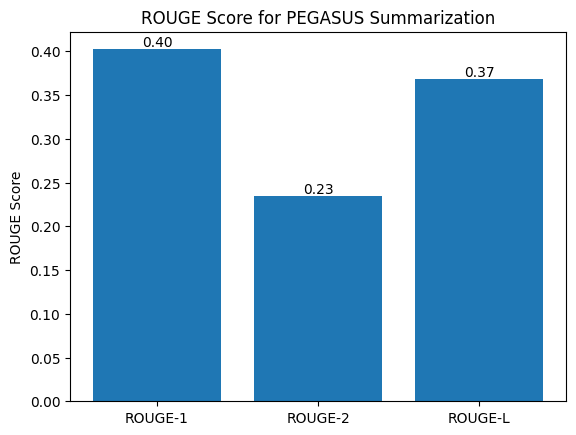

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from rouge import Rouge

# Function to calculate ROUGE score
def calculate_rouge_score(pegasus_summary, summary):
    rouge = Rouge()
    scores = rouge.get_scores(pegasus_summary, summary)
    return scores[0]['rouge-1']['f'], scores[0]['rouge-2']['f'], scores[0]['rouge-l']['f']

# Example data
pegasus_summary = '''
              **Title: Breakthrough in Renewable Energy: Novel Solar Technology Promises Game-Changing Efficiency**
              **Introduction:** In a world increasingly grappling with climate change, the quest for sustainable and efficient energy sources has never been more critical. With its unparalleled efficiency and versatility, this breakthrough technology has the potential to revolutionize the global energy landscape in several ways: 1. **Accelerated Transition to Renewable Energy:** By significantly increasing the efficiency of solar energy production, SolarMax could expedite the transition away from fossil fuels.
              '''
actual_summary = '''
                  With its unprecedented efficiency and versatility, this breakthrough technology holds the promise of a cleaner, more resilient energy future for generations to come.
                   As researchers continue to push the boundaries of innovation and technology, SolarMax serves as a shining example of human ingenuity and determination in the face of one of the greatest challenges of our time: combating climate change and securing a sustainable planet for future generations. **Accelerated Transition to Renewable Energy:** By significantly increasing the efficiency of solar energy production, SolarMax could expedite the transition away from fossil fuels, reducing greenhouse gas emissions and mitigating the effects of climate change. **Integration and Infrastructure:** The integration of SolarMax into existing energy infrastructure and regulatory frameworks will require careful planning and coordination to maximize its benefits and ensure a smooth transition.
                  **Economic Opportunities:** The development and deployment of SolarMax could create new economic opportunities, driving job growth in the renewable energy sector and stimulating innovation and investment.
                  '''

# Calculate ROUGE score for BERT-generated summary
rouge_scores = calculate_rouge_score(pegasus_summary, summary)

# Plotting
labels = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']
scores = rouge_scores

plt.bar(labels, scores)
plt.ylabel('ROUGE Score')
plt.title('ROUGE Score for PEGASUS Summarization')

for i in range(len(scores)):
    plt.text(i, scores[i], f'{scores[i]:.2f}', ha='center', va='bottom')

plt.show()

## **Using T5 (Transfer text-to-text Transformer)**

In [ ]:
from transformers import T5ForConditionalGeneration, T5Tokenizer

# T5
t5_tokenizer = T5Tokenizer.from_pretrained("t5-large")
t5_model = T5ForConditionalGeneration.from_pretrained("t5-large")
inputs = t5_tokenizer([Context], max_length=1024, return_tensors='pt', truncation=True)
t5_summary_ids = t5_model.generate(inputs['input_ids'], max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
t5_summary = t5_tokenizer.decode(t5_summary_ids[0], skip_special_tokens=True)
print("T5 Summary:")
print(t5_summary)

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


model.safetensors:   0%|          | 0.00/2.95G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

T5 Summary:
. SolarMax represents a significant breakthrough in renewable energy technology that holds the promise of a cleaner, more resilient energy future for future generations. SolarMax is a shining example of human determination and determination in the face of one of the greatest challenges of our time: combating climate change and securing a sustainable planet for future generations. **About SolarMax:** SolarMax was developed by a team of researchers at [Institution/Company]. **About SolarMax:** SolarMax was developed by


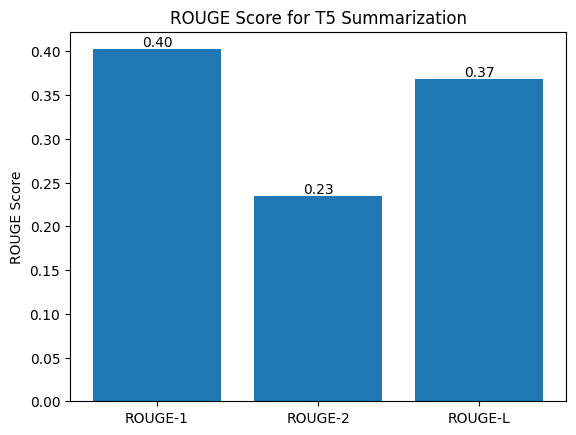

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from rouge import Rouge

# Function to calculate ROUGE score
def calculate_rouge_score(t5_summary, summary):
    rouge = Rouge()
    scores = rouge.get_scores(t5_summary, summary)
    return scores[0]['rouge-1']['f'], scores[0]['rouge-2']['f'], scores[0]['rouge-l']['f']

# Example data
t5_summary = '''
              **Title: Breakthrough in Renewable Energy: Novel Solar Technology Promises Game-Changing Efficiency**
              **Introduction:** In a world increasingly grappling with climate change, the quest for sustainable and efficient energy sources has never been more critical. With its unparalleled efficiency and versatility, this breakthrough technology has the potential to revolutionize the global energy landscape in several ways: 1. **Accelerated Transition to Renewable Energy:** By significantly increasing the efficiency of solar energy production, SolarMax could expedite the transition away from fossil fuels.
              '''
actual_summary = '''
                  With its unprecedented efficiency and versatility, this breakthrough technology holds the promise of a cleaner, more resilient energy future for generations to come.
                   As researchers continue to push the boundaries of innovation and technology, SolarMax serves as a shining example of human ingenuity and determination in the face of one of the greatest challenges of our time: combating climate change and securing a sustainable planet for future generations. **Accelerated Transition to Renewable Energy:** By significantly increasing the efficiency of solar energy production, SolarMax could expedite the transition away from fossil fuels, reducing greenhouse gas emissions and mitigating the effects of climate change. **Integration and Infrastructure:** The integration of SolarMax into existing energy infrastructure and regulatory frameworks will require careful planning and coordination to maximize its benefits and ensure a smooth transition.
                  **Economic Opportunities:** The development and deployment of SolarMax could create new economic opportunities, driving job growth in the renewable energy sector and stimulating innovation and investment.
                  '''

# Calculate ROUGE score for BERT-generated summary
rouge_scores = calculate_rouge_score(t5_summary, summary)

# Plotting
labels = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']
scores = rouge_scores

plt.bar(labels, scores)
plt.ylabel('ROUGE Score')
plt.title('ROUGE Score for T5 Summarization')

for i in range(len(scores)):
    plt.text(i, scores[i], f'{scores[i]:.2f}', ha='center', va='bottom')

plt.show()

# **Next_Word Prediction(Text Generation)**

In [ ]:
print(Context)

**Title: Breakthrough in Renewable Energy: Novel Solar Technology Promises Game-Changing Efficiency**

**Introduction:**
In a world increasingly grappling with climate change, the quest for sustainable and efficient energy sources has never been more critical. The latest breakthrough in renewable energy comes in the form of revolutionary solar technology that promises to transform the landscape of clean energy production. Developed by a team of researchers at [Institution/Company], this innovation boasts unprecedented efficiency levels that could potentially revolutionize the global energy sector.

**Background:**
Solar energy has long been hailed as a promising solution to the world's energy needs. Traditional solar panels have made significant strides in recent years, but their efficiency and scalability still pose challenges. However, the emergence of next-generation solar technologies offers renewed hope for a future powered by clean, renewable energy.

**The Breakthrough:**
The br

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer()

In [ ]:
tokenizer.fit_on_texts([Context])

In [ ]:
len(tokenizer.word_index)  # Number of words.

343

In [ ]:
tokenizer.word_index   # Tokanizing integer to the each word in the text.

{'and': 1,
 'the': 2,
 'of': 3,
 'energy': 4,
 'a': 5,
 'to': 6,
 'solarmax': 7,
 'in': 8,
 'solar': 9,
 'efficiency': 10,
 'renewable': 11,
 'technology': 12,
 'for': 13,
 'breakthrough': 14,
 'with': 15,
 'its': 16,
 'that': 17,
 'could': 18,
 'challenges': 19,
 "solarmax's": 20,
 'sustainable': 21,
 'clean': 22,
 'by': 23,
 'this': 24,
 'innovation': 25,
 'as': 26,
 'scalability': 27,
 'future': 28,
 'into': 29,
 'or': 30,
 'development': 31,
 'potential': 32,
 'climate': 33,
 'change': 34,
 'has': 35,
 'production': 36,
 'unprecedented': 37,
 'global': 38,
 'panels': 39,
 'significant': 40,
 'technologies': 41,
 'represents': 42,
 'sunlight': 43,
 '1': 44,
 '2': 45,
 'versatility': 46,
 '3': 47,
 '4': 48,
 'integration': 49,
 'infrastructure': 50,
 'transition': 51,
 'economic': 52,
 'novel': 53,
 'promises': 54,
 'sources': 55,
 'been': 56,
 'more': 57,
 'landscape': 58,
 'developed': 59,
 'researchers': 60,
 'at': 61,
 'revolutionize': 62,
 'sector': 63,
 'long': 64,
 'solution':

In [ ]:
input_sequences = []
for sentence in Context.split('\n'):
  print(tokenizer.texts_to_sequences([sentence]))
# Here this showing it in 2D array. eg.-> [[93, 1, 13]]

# lets convert it.

[[101, 14, 8, 11, 4, 53, 9, 12, 54, 102, 103, 10]]
[[]]
[[104]]
[[8, 5, 105, 106, 107, 15, 33, 34, 2, 108, 13, 21, 1, 109, 4, 55, 35, 110, 56, 57, 111, 2, 112, 14, 8, 11, 4, 113, 8, 2, 114, 3, 115, 9, 12, 17, 54, 6, 116, 2, 58, 3, 22, 4, 36, 59, 23, 5, 117, 3, 60, 61, 118, 119, 24, 25, 120, 37, 10, 121, 17, 18, 122, 62, 2, 38, 4, 63]]
[[]]
[[123]]
[[9, 4, 35, 64, 56, 124, 26, 5, 125, 65, 6, 2, 126, 4, 66, 67, 9, 39, 127, 128, 40, 129, 8, 130, 68, 131, 132, 10, 1, 27, 133, 134, 19, 135, 2, 136, 3, 137, 138, 9, 41, 139, 140, 141, 13, 5, 28, 142, 23, 22, 11, 4]]
[[]]
[[2, 14]]
[[2, 14, 12, 143, 7, 42, 5, 40, 144, 145, 8, 9, 4, 10, 146, 147, 9, 39, 17, 148, 69, 149, 150, 6, 70, 43, 29, 71, 7, 151, 5, 53, 152, 153, 23, 154, 2, 155, 156, 3, 25, 157, 158, 159, 160, 30, 161, 162]]
[[]]
[[61, 2, 163, 3, 7, 164, 5, 165, 72, 17, 166, 167, 168, 169, 170, 24, 171, 59, 172, 68, 3, 73, 1, 173, 174, 7, 6, 175, 5, 176, 177, 3, 43, 178, 179, 17, 67, 9, 39, 180, 181, 182, 26, 5, 183, 7, 184, 185, 37, 10,

In [ ]:
input_sequences = []
for sentence in Context.split('\n'):
  tokenized_sentence = tokenizer.texts_to_sequences([sentence])[0]

  for i in range(1,len(tokenized_sentence)):
    input_sequences.append(tokenized_sentence[:i+1])

In [ ]:
input_sequences

[[101, 14],
 [101, 14, 8],
 [101, 14, 8, 11],
 [101, 14, 8, 11, 4],
 [101, 14, 8, 11, 4, 53],
 [101, 14, 8, 11, 4, 53, 9],
 [101, 14, 8, 11, 4, 53, 9, 12],
 [101, 14, 8, 11, 4, 53, 9, 12, 54],
 [101, 14, 8, 11, 4, 53, 9, 12, 54, 102],
 [101, 14, 8, 11, 4, 53, 9, 12, 54, 102, 103],
 [101, 14, 8, 11, 4, 53, 9, 12, 54, 102, 103, 10],
 [8, 5],
 [8, 5, 105],
 [8, 5, 105, 106],
 [8, 5, 105, 106, 107],
 [8, 5, 105, 106, 107, 15],
 [8, 5, 105, 106, 107, 15, 33],
 [8, 5, 105, 106, 107, 15, 33, 34],
 [8, 5, 105, 106, 107, 15, 33, 34, 2],
 [8, 5, 105, 106, 107, 15, 33, 34, 2, 108],
 [8, 5, 105, 106, 107, 15, 33, 34, 2, 108, 13],
 [8, 5, 105, 106, 107, 15, 33, 34, 2, 108, 13, 21],
 [8, 5, 105, 106, 107, 15, 33, 34, 2, 108, 13, 21, 1],
 [8, 5, 105, 106, 107, 15, 33, 34, 2, 108, 13, 21, 1, 109],
 [8, 5, 105, 106, 107, 15, 33, 34, 2, 108, 13, 21, 1, 109, 4],
 [8, 5, 105, 106, 107, 15, 33, 34, 2, 108, 13, 21, 1, 109, 4, 55],
 [8, 5, 105, 106, 107, 15, 33, 34, 2, 108, 13, 21, 1, 109, 4, 55, 35],
 [8, 5

In [ ]:
max_len = max([len(x) for x in input_sequences])
max_len

83

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_input_sequences = pad_sequences(input_sequences, maxlen = max_len, padding='pre')

The code you provided is using the pad_sequences function from the tensorflow.keras.preprocessing.sequence module. This function is typically used to pad sequences to ensure uniform length, which is often necessary when working with neural networks.

Here's what each part of the code does:

from tensorflow.keras.preprocessing.sequence import pad_sequences: This line imports the pad_sequences function from the tensorflow.keras.preprocessing.sequence module. This function is used to pad sequences to a maximum length.

padded_input_sequences = pad_sequences(input_sequences, maxlen=max_len, padding='pre'): This line applies padding to the input_sequences array.

input_sequences: This is assumed to be a list of sequences (lists of integers).

maxlen: This parameter specifies the maximum length of sequences after padding. Sequences longer than this length will be truncated, and sequences shorter than this length will be padded.

padding: This parameter specifies whether to pad sequences at the beginning ('pre') or at the end ('post'). In this case, it pads sequences at the beginning.

The result, padded_input_sequences, will be a 2D numpy array where each row corresponds to a sequence, and the sequences are padded or truncated to have a length of max_len.

In [ ]:
padded_input_sequences

array([[  0,   0,   0, ...,   0, 101,  14],
       [  0,   0,   0, ..., 101,  14,   8],
       [  0,   0,   0, ...,  14,   8,  11],
       ...,
       [  0,   0,   2, ...,  21, 343,  13],
       [  0,   2,  31, ..., 343,  13,  28],
       [  2,  31,   3, ...,  13,  28, 100]], dtype=int32)

In [ ]:
X = padded_input_sequences[:,:-1]

X

array([[  0,   0,   0, ...,   0,   0, 101],
       [  0,   0,   0, ...,   0, 101,  14],
       [  0,   0,   0, ..., 101,  14,   8],
       ...,
       [  0,   0,   2, ...,   5,  21, 343],
       [  0,   2,  31, ...,  21, 343,  13],
       [  2,  31,   3, ..., 343,  13,  28]], dtype=int32)

In [ ]:
y = padded_input_sequences[:,-1]

In [ ]:
X.shape

(682, 82)

In [ ]:
y.shape

(682,)

In [ ]:
from tensorflow.keras.utils import to_categorical
y = to_categorical(y,num_classes=344)

In [ ]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y.shape

(682, 344)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [ ]:
model = Sequential()
model.add(Embedding(344, 200, input_length=82))
model.add(LSTM(150, return_sequences=True, input_shape=(82, 200)))
model.add(LSTM(150))
model.add(Dense(344, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X,y,epochs=100)

Epoch 1/100
22/22 [==============================] - 11s 153ms/step - loss: 5.7070 - accuracy: 0.0220
Epoch 2/100
22/22 [==============================] - 3s 113ms/step - loss: 5.3990 - accuracy: 0.0308
Epoch 3/100
22/22 [==============================] - 2s 87ms/step - loss: 5.3145 - accuracy: 0.0293
Epoch 4/100
22/22 [==============================] - 1s 68ms/step - loss: 5.2843 - accuracy: 0.0469
Epoch 5/100
22/22 [==============================] - 1s 63ms/step - loss: 5.2770 - accuracy: 0.0469
Epoch 6/100
22/22 [==============================] - 2s 107ms/step - loss: 5.2637 - accuracy: 0.0455
Epoch 7/100
22/22 [==============================] - 1s 42ms/step - loss: 5.2524 - accuracy: 0.0440
Epoch 8/100
22/22 [==============================] - 1s 56ms/step - loss: 5.2121 - accuracy: 0.0484
Epoch 9/100
22/22 [==============================] - 1s 44ms/step - loss: 5.1350 - accuracy: 0.0557
Epoch 10/100
22/22 [==============================] - 1s 27ms/step - loss: 5.0367 - accuracy: 0.

In [ ]:
import time
import numpy as np
text = "At the heart of SolarMax"

for i in range(10):
  # tokenize
  token_text = tokenizer.texts_to_sequences([text])[0]
  # padding
  padded_token_text = pad_sequences([token_text], maxlen=82, padding='pre')
  # predict
  pos = np.argmax(model.predict(padded_token_text))

  for word,index in tokenizer.word_index.items():
    if index == pos:
      text = text + " " + word
      print(text)
      time.sleep(2)

1/1 [==============================] - 2s 2s/step
At the heart of SolarMax lies
1/1 [==============================] - 0s 59ms/step
At the heart of SolarMax lies a
1/1 [==============================] - 0s 102ms/step
At the heart of SolarMax lies a sophisticated
1/1 [==============================] - 0s 19ms/step
At the heart of SolarMax lies a sophisticated nanomaterial
1/1 [==============================] - 0s 19ms/step
At the heart of SolarMax lies a sophisticated nanomaterial that
1/1 [==============================] - 0s 19ms/step
At the heart of SolarMax lies a sophisticated nanomaterial that exhibits
1/1 [==============================] - 0s 27ms/step
At the heart of SolarMax lies a sophisticated nanomaterial that exhibits exceptional
1/1 [==============================] - 0s 20ms/step
At the heart of SolarMax lies a sophisticated nanomaterial that exhibits exceptional light
1/1 [==============================] - 0s 19ms/step
At the heart of SolarMax lies a sophisticated nanomat